# Author: Midrar Adham
## Image Processing

In [220]:
import os
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import ImageGrid

In [221]:
dir = '../../sample_data/'
ocean_img = cv.imread(dir+'ocean.JPG')
ocean_img = cv.cvtColor(ocean_img, cv.COLOR_BGR2RGB)
downtown_img = cv.imread(dir+'downtown.JPG')
downtown_img = cv.cvtColor(downtown_img, cv.COLOR_BGR2RGB)


In [222]:
def disp_images (shape = tuple, images = list, title = list, params = bool):
    fig = plt.figure(figsize = (16,10))
    grid = ImageGrid(fig=fig,
                 rect=(1,1,1),
                 nrows_ncols=shape,
                 axes_pad=0.25, # gap between axes
                 label_mode='L'
                 )
    
    for ax, im, t in zip(grid, images, title):
        if not params:
            ax.set_title(t)
            ax.imshow(im)
        else:
            ax.set_title(t)
            ax.imshow(im, cmap='gray', vmin=0, vmax=256)
            
            

# Pixel Transformations
**Show an image next to two transformed images that have been brightened with a positive bias and dimmed with a negative bias**
---

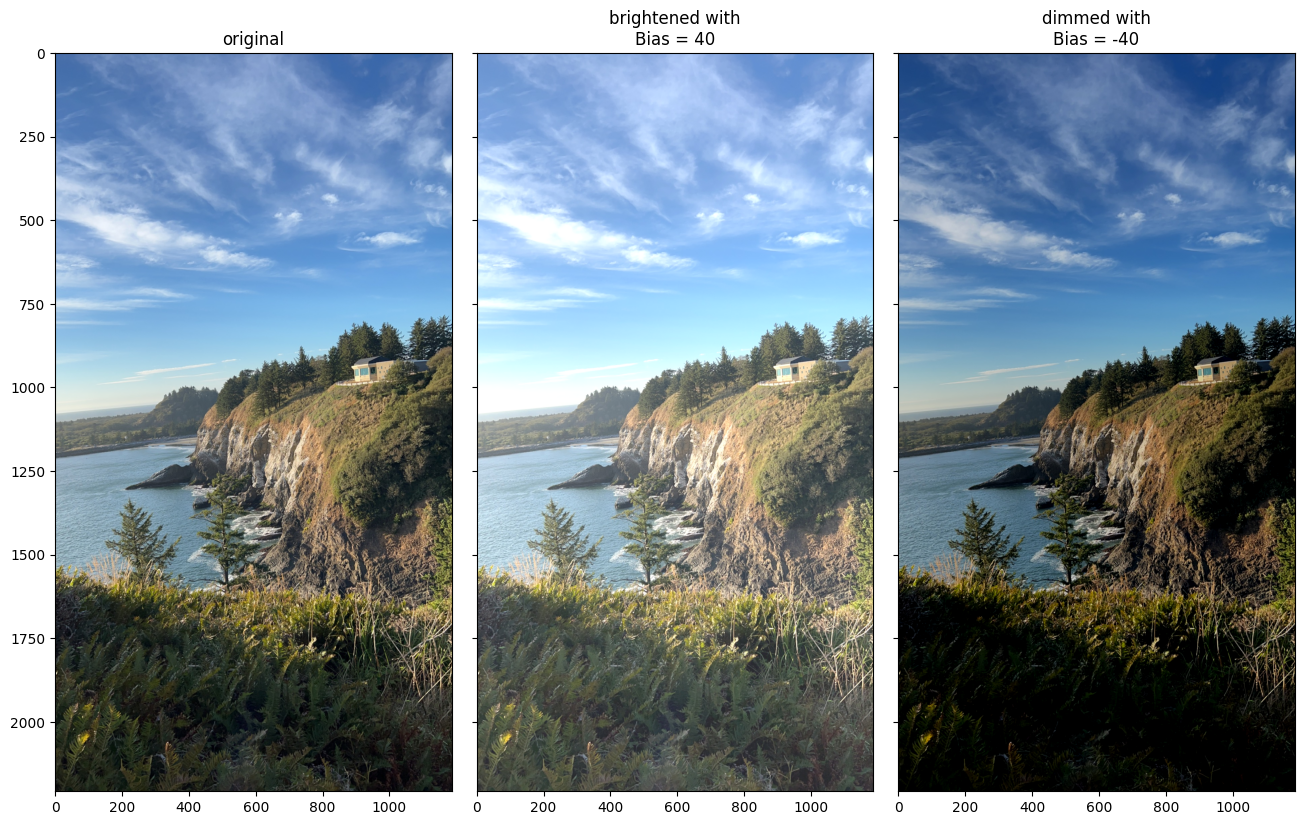

In [223]:
bias = 40
bright_ocean_img = cv.add(ocean_img, bias)
dim_ocean_img = cv.add(ocean_img, bias * -1)
disp_images(shape=(1,3), images=[ocean_img, bright_ocean_img, dim_ocean_img],
            title=['original',f'brightened with\nBias = {bias}',f'dimmed with\nBias = {bias * -1}'],
            params=False)

**Show an image next to two transformed images that have been scaled with a scale factor greater than 1.0 and with a scale factor less than 1.0**
---

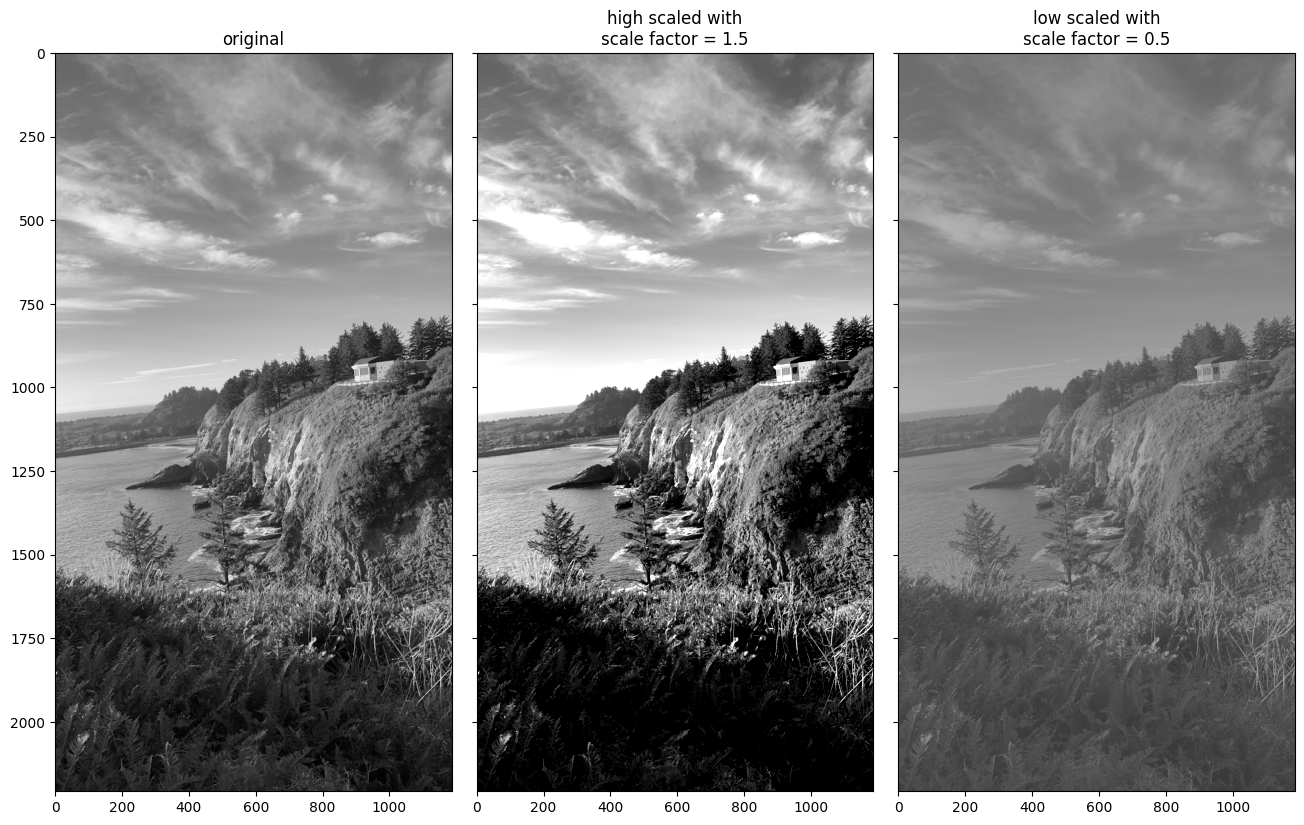

In [224]:
high_scale_factor = 1.5
low_scaled_factor = 0.5
cp_ocean_img = ocean_img.copy().astype(np.float32)
gray_ocean_img = cv.cvtColor(cp_ocean_img,cv.COLOR_RGB2GRAY)

mean_ocean_img = gray_ocean_img.mean()
high_scaled_ocean_img = (gray_ocean_img-mean_ocean_img) * high_scale_factor + mean_ocean_img
low_scaled_ocean_img = (gray_ocean_img-mean_ocean_img) * low_scaled_factor + mean_ocean_img

disp_images(shape=(1,3),
            images=[gray_ocean_img, high_scaled_ocean_img, low_scaled_ocean_img],
            title=['original',f'high scaled with\nscale factor = {high_scale_factor}',
                   f'low scaled with\nscale factor = {low_scaled_factor}'],
            params=True)

**Show two original images, and then a blended version of these images**
---

Here is the equation for blending two images:
$$
\begin{equation*}
g(x) = (1-\alpha)f_{o} + \alpha f_{1}(x)
\end{equation*}
$$
where:

- $\alpha$ is the weight of the pixels array in the first image.
- $\beta$ is the weight of the pixels array in the second image.
- $f_{0}$ is the first image represented as a fucntion.
- $f_{1}$ is the second image represented as a fucntion.
- $g(x)$ is the blended output image represented by a function.

However, as per the [OpenCV documentation](https://docs.opencv.org/4.x/d0/d86/tutorial_py_image_arithmetics.html), another aparameter
is added to adjust the brightness. Adding this parameter to the equation, it becomes:

$$
\begin{equation*}
g(x) = (1-\alpha)f_{o} + \alpha f_{1}(x) + \gamma
\end{equation*}
$$

In this question, $\beta$ is given higher value than $\alpha$ to get the second image more appearance than the first image in the output.

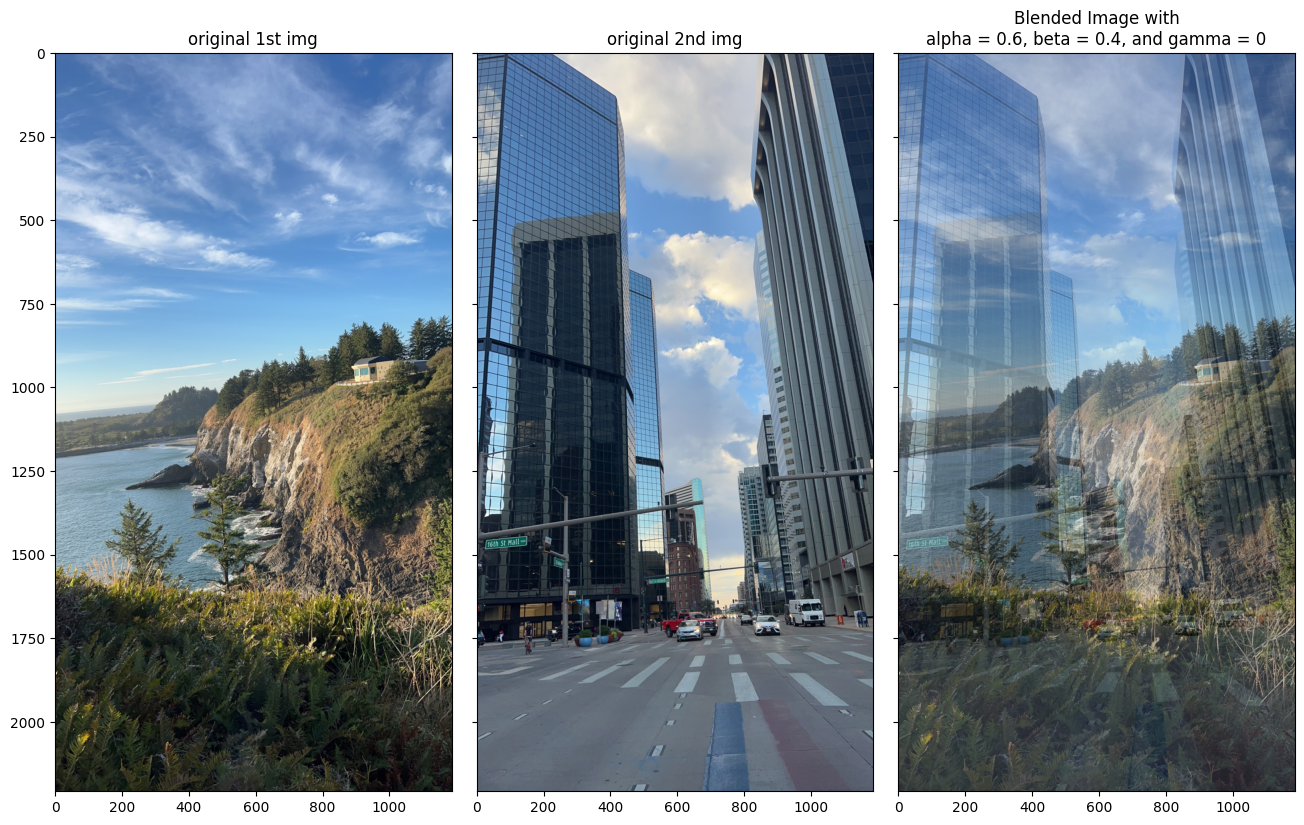

In [225]:
alpha = 0.6
beta = 0.4
gamma = 0
blended = cv.addWeighted(src1=ocean_img, alpha=alpha,src2=downtown_img,beta=beta,gamma=gamma)
disp_images
disp_images(shape=(1,3),
            images=[ocean_img, downtown_img, blended],
            title=['original 1st img','original 2nd img',f'Blended Image with\nalpha = {alpha}, beta = {beta}, and gamma = {gamma}'],
            params=False)

**Show an original image, a masked version of that image, a second image, and finally the original image with everything outside the mask replaced by the second image**
---

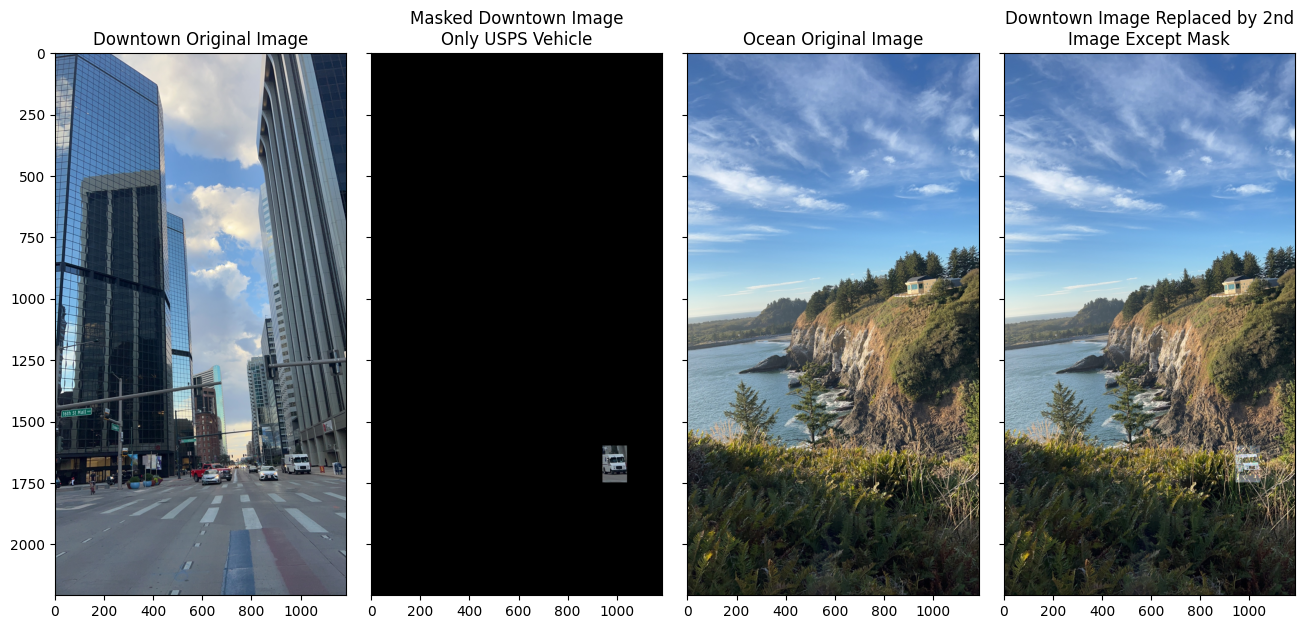

In [250]:
# Get first image (downtown) dimensions
rows, cols, channels = downtown_img.shape

# create a binary mask so we can use bitwise method.
mask = np.zeros_like(downtown_img,dtype=np.uint8)

# mask the region of interest (the usps vehicle)
mask[rows-608:rows-458, cols-246:cols-146, :] = 255

# only show the usps vehicle with the surrounding in black
masked_img = cv.bitwise_and(downtown_img,mask)

# replace everything in the surrounding with the second image (ocean)
result = cv.bitwise_or(masked_img, ocean_img)

disp_images(shape=(1,4),
            images=[downtown_img,masked_img, ocean_img,result],
            title=['Downtown Original Image',
                   'Masked Downtown Image\nOnly USPS Vehicle',
                   'Ocean Original Image',
                   'Downtown Image Replaced by 2nd\nImage Except Mask'],
            params=False)
